In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

|pyplot API|Objecte-oriented API|description|
|-|-|-|
|`suptitle`|`suptitle`|title of figure|
|`title`|`set_title`|title of subplot `ax`|
|`xlabel`|`set_xlabel`|x-axis label|
|`ylabel`|`set_ylabel`|y-axis label|
|`figtext`|`text`|figure text|
|`text`|`text`|Axes text|
|`annoatate`|`annotate`|Axes annotation with arrow|

## 1. Text 사용하기

#### 1.1. Text in Viz
시각화에서 Text는 잘못된 전달에서 생기는 **오해와 설명을 추가**해줄 수 있다.

* 하지만 Text를 많이 쓰면 이해하기 더 어려워진다.

#### Anatomy of a Figure(Text)

* Title : 가장 큰 주제를 설명 `fig.suptitle()` , `ax.set_title()`
* Label : 축에 해당하는 데이터 정보 제공
* Tick Label : 축에 눈금을 사용하여 스케일 정보 추가
* Legend : 한 그래프에서 2개 이상의 서로 다른 데이터를 분류하기 위해 사용하는 보조 정보 
* Annotation(Text) : 그 외의 시각화에 대한 설명 추가

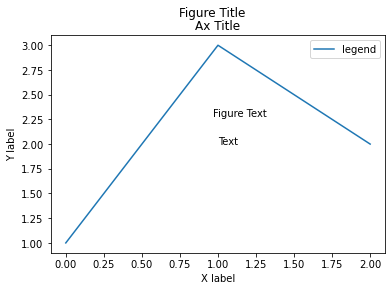

In [3]:
fig, ax = plt.subplots()

fig.suptitle("Figure Title")

ax.plot([1,3,2], label="legend")
ax.legend()

ax.set_title("Ax Title")
ax.set_xlabel("X label")
ax.set_ylabel("Y label")

ax.text(x=1, y=2, s='Text')
fig.text(0.5, 0.6, s="Figure Text")

plt.show()

## 2. Text Properties

#### 2-1. Font Components

Text는 바꿀 수 있는 요소들이 존재한다.

- `family` : 글씨체
- `size` or `fontsize` : 글씨 크기
- `style` or `fontstyle`
- `weight` or `fontweight` : 글씨 두께(숫자로도 가능)


* 글씨체에 따른 가독성 참고자료
    - [Material Design : Understanding typography](https://material.io/design/typography/understanding-typography.html)
    - [StackExchange : Is there any research with respect to how font-weight affects readability?](https://ux.stackexchange.com/questions/52971/is-there-any-research-with-respect-to-how-font-weight-affects-readability)





![](https://matplotlib.org/stable/_images/sphx_glr_fonts_demo_001.png)
[Fonts Demo](https://matplotlib.org/stable/gallery/text_labels_and_annotations/fonts_demo.html)

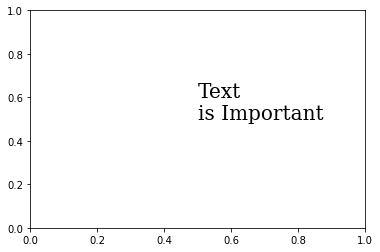

In [6]:
fig, ax = plt.subplots()


ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight=3,
        fontfamily='serif',
       )

plt.show()

#### 2-2. Details
폰트 자체와는 다르지만 커스텀할 수 있는 요소들

- `color`
- `linespacing` : 줄 간격
- `backgroundcolor` : 배경색, bbox에서 바꾸는것이 좋다.
- `alpha` 
- `zorder` :Text의 z축으로의 순서, ppt의 앞으로 가져오기와 같은 역할
- `visible`

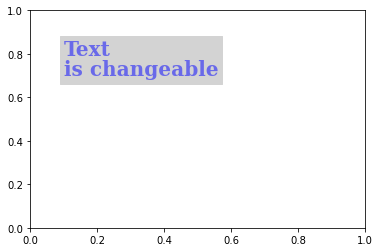

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.1, y=0.7, s='Text\nis changeable',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='blue',
        linespacing=1,
        backgroundcolor='lightgray',
        alpha=0.5
       )


plt.show()

#### 2-3. Alignment
정렬

- `ha` : horizontal alignment
- `va` : vertical alignment
- `rotation`
- `multialignment`

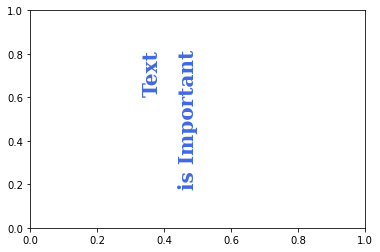

In [14]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        va='center', # top, bottom, center
        ha='right', # left, right, center
        rotation='vertical' # horizontal?
       )
plt.show()

#### 2-3. Advanced

- `bbox` : dict 타입으로 전달해주어야 한다.

- [Drawing fancy boxes](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)

![image.png](https://matplotlib.org/stable/_images/sphx_glr_fancybox_demo_001.png)

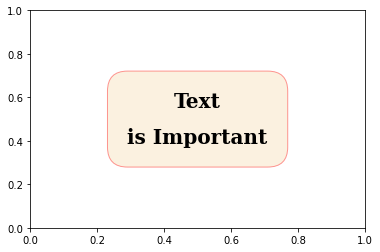

In [19]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='black',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='horizontal', # vertical?
        bbox=dict(boxstyle='round', facecolor='wheat', 
                  ec='red',pad=1,alpha=0.4)
       )
plt.show()

## 3. Text API 별 추가 사용법 with 실습

In [20]:
student = pd.read_csv('./StudentsPerformance.csv')
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
489,male,group A,associate's degree,free/reduced,completed,79,82,82
431,female,group C,high school,standard,none,61,72,70
506,male,group A,high school,standard,none,68,70,66
322,female,group C,some college,standard,none,71,81,80
316,female,group D,master's degree,standard,completed,77,82,91


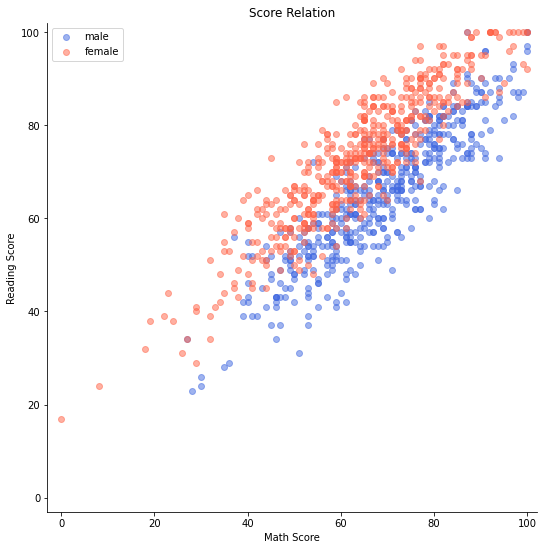

In [21]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub['math score'], y=student_sub['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 
ax.legend()   

plt.show()

#### 3-1. Title & Legend
* 제목의 위치 조정
* 범례에 제목, 그림자 달기, 위치 조정

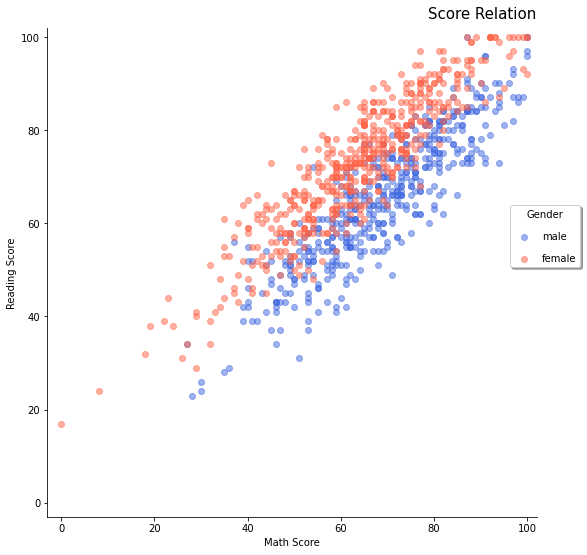

In [34]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub['math score'], y=student_sub['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation',
            loc='right', va='bottom',
            fontweight=4, fontsize=15) 

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
    loc = 'lower right',
    bbox_to_anchor=[1.1, 0.5],# 외부로 빼서 위치 지정  
#     ncol=2
)  

plt.show()

- bbox_to_anchor을 더 이해하고 싶다면 [link](https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib/39806180#39806180) 참고

#### 3-2. Ticks & Text
* tick을 없애거나 조정
* text alignment가 필요한 이유

In [35]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1:
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0 - 10        2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: math-range, dtype: int64

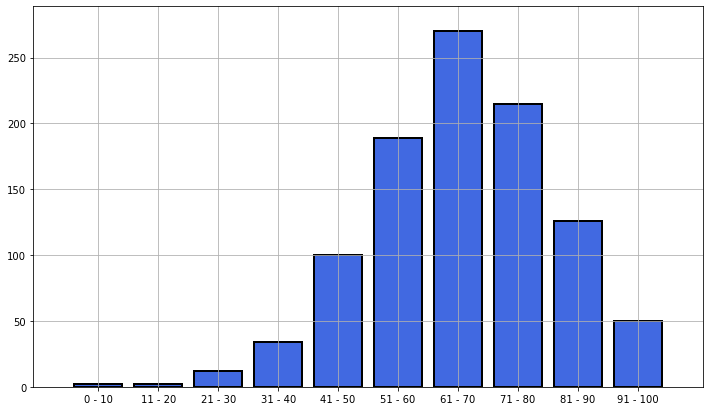

In [39]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.bar(math_grade.index,
      math_grade,
      color='royalblue',
      linewidth=2,
      edgecolor='black'
      )

ax.margins(0.07)
ax.grid()
plt.show()

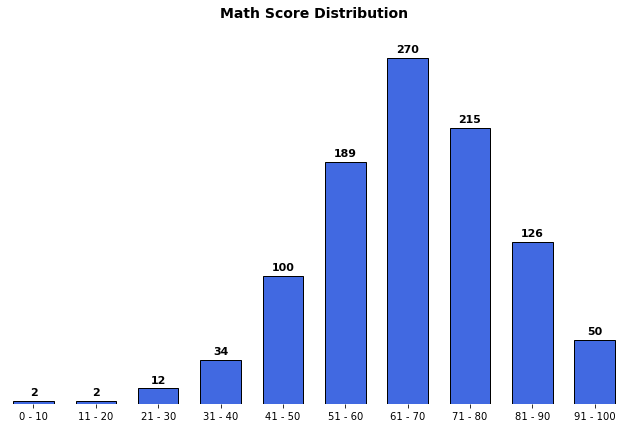

In [40]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.01, 0.1)
ax.set(frame_on=False) # 프레임을 다 꺼줌
ax.set_yticks([]) # y range 없어짐
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

# iteritemes() : index, value를 한번에 받아오는 메서드
for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold'
           )

plt.show()

#### 3-3. Annotate
* 화살표 사용하기 `arrowprops`

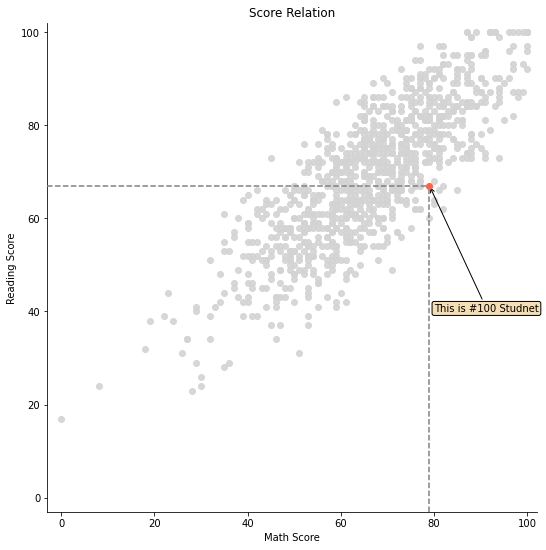

In [50]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 100

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--',
       zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
           )

plt.show()